In [370]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('/kaggle/input/instagram-fake-and-real-accounts-dataset/final-v1.csv')
# Remove leading and trailing whitespaces from column names
df.head()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url,is_fake
0,0.001,0.257,13,1,1,13,0,0,0,0,0,0,1
1,0.000,0.958,9,1,0,0,0,1,0,0,0,0,1
2,0.000,0.253,12,0,0,0,0,0,0,0,0,0,1
3,0.000,0.977,10,1,0,0,0,0,0,0,0,0,1
4,0.000,0.321,11,0,0,11,1,0,0,0,0,0,1


In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edge_followed_by      785 non-null    float64
 1   edge_follow           785 non-null    float64
 2   username_length       785 non-null    int64  
 3   username_has_number   785 non-null    int64  
 4   full_name_has_number  785 non-null    int64  
 5   full_name_length      785 non-null    int64  
 6   is_private            785 non-null    int64  
 7   is_joined_recently    785 non-null    int64  
 8   has_channel           785 non-null    int64  
 9   is_business_account   785 non-null    int64  
 10  has_guides            785 non-null    int64  
 11  has_external_url      785 non-null    int64  
 12  is_fake               785 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 79.9 KB


In [372]:
df.isnull().sum()

edge_followed_by        0
edge_follow             0
username_length         0
username_has_number     0
full_name_has_number    0
full_name_length        0
is_private              0
is_joined_recently      0
has_channel             0
is_business_account     0
has_guides              0
has_external_url        0
is_fake                 0
dtype: int64

In [373]:
df.shape

(785, 13)

In [374]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
edge_followed_by,785.0,0.002223,0.036105,0.0,0.000,0.000,0.000,1.0
edge_follow,785.0,0.401606,0.293845,0.0,0.135,0.336,0.623,1.0
username_length,785.0,11.630573,3.284329,5.0,9.000,11.000,13.000,26.0
username_has_number,785.0,0.644586,0.478944,0.0,0.000,1.000,1.000,1.0
full_name_has_number,785.0,0.109554,0.312532,0.0,0.000,0.000,0.000,1.0
full_name_length,785.0,6.129936,6.943903,0.0,0.000,5.000,11.000,30.0
is_private,785.0,0.184713,0.388312,0.0,0.000,0.000,0.000,1.0
is_joined_recently,785.0,0.361783,0.480823,0.0,0.000,0.000,1.000,1.0
has_channel,785.0,0.000000,0.000000,0.0,0.000,0.000,0.000,0.0
is_business_account,785.0,0.073885,0.261751,0.0,0.000,0.000,0.000,1.0


In [375]:
has_channel_values = df['has_channel'].unique()

if 0 in has_channel_values and len(has_channel_values) > 1:
    print("The 'has_channel' column has values different from 0.")
else:
    print("The 'has_channel' column only contains 0.")
    df = df.drop('has_channel', axis=1)
    
df.info()

The 'has_channel' column only contains 0.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edge_followed_by      785 non-null    float64
 1   edge_follow           785 non-null    float64
 2   username_length       785 non-null    int64  
 3   username_has_number   785 non-null    int64  
 4   full_name_has_number  785 non-null    int64  
 5   full_name_length      785 non-null    int64  
 6   is_private            785 non-null    int64  
 7   is_joined_recently    785 non-null    int64  
 8   is_business_account   785 non-null    int64  
 9   has_guides            785 non-null    int64  
 10  has_external_url      785 non-null    int64  
 11  is_fake               785 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 73.7 KB


<Axes: >

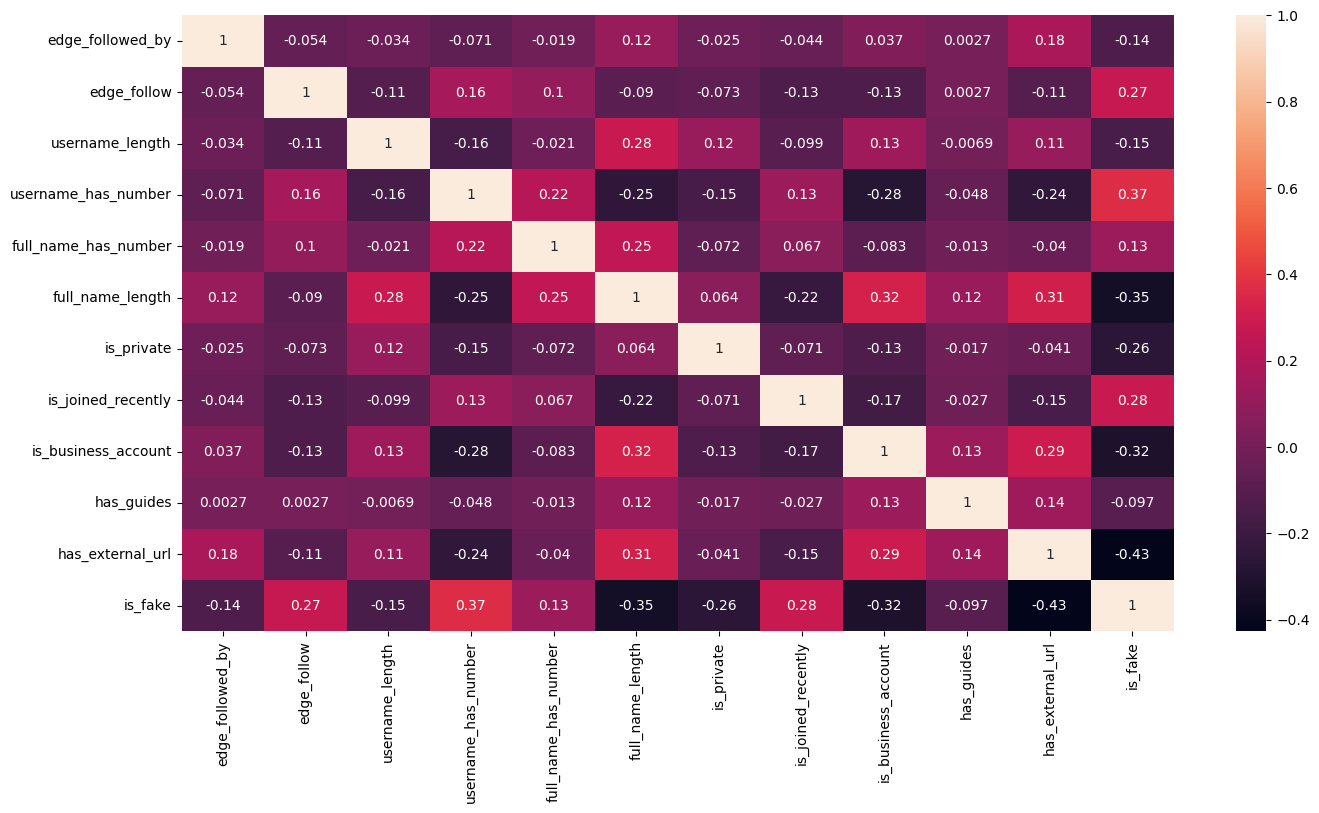

In [376]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True)

In [377]:
df['is_fake'].value_counts()

is_fake
1    692
0     93
Name: count, dtype: int64

In [378]:
from sklearn.model_selection import train_test_split

x=df.drop(['is_fake'], axis=1)
y=df['is_fake']

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.35, random_state=52)

In [379]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a logistic regression model
model = LogisticRegression(random_state=52, max_iter=1000)

# Train the model on the training data
model.fit(x_train, y_train)

# Predictions on training set
train_predictions = model.predict(x_train)

# Predictions on test set
test_predictions = model.predict(x_test)

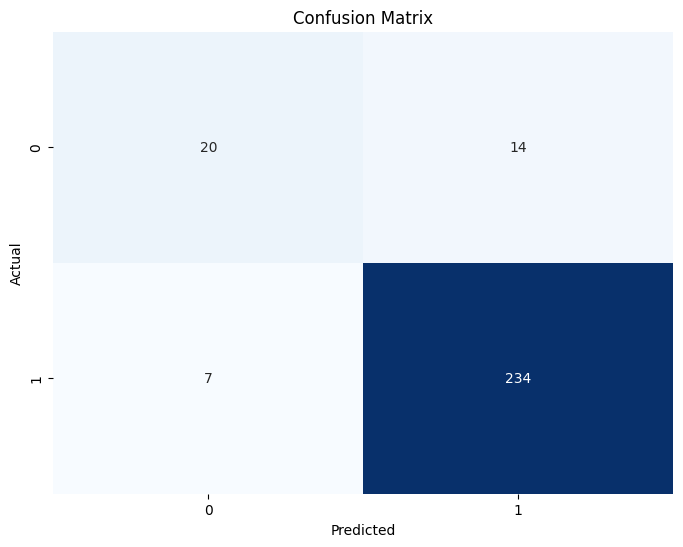

In [380]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have the test predictions and actual labels
# Replace 'test_predictions' and 'y_test' with your actual variables
cm = confusion_matrix(y_test, test_predictions)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [381]:
accuracy_score(y_train, train_predictions)

0.9196078431372549

In [382]:
accuracy_score(y_test, test_predictions)

0.9236363636363636

In [383]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.74      0.59      0.66        34
           1       0.94      0.97      0.96       241

    accuracy                           0.92       275
   macro avg       0.84      0.78      0.81       275
weighted avg       0.92      0.92      0.92       275

